Import the dataset

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('vg-funds.csv').fillna(0)
dataset.tail()

,ticker,asset_class,expense_ratio,price,change,change_pct,ytd,one_yr,five_yr,ten_yr,inception
125,VVIAX,Stock - Large-Cap Value,0.05%,$39.81,-$0.69decreased,-1.70%decreased,-2.09%,5.86%,10.33%,13.21%,6.56%(11/13/2000)
126,VWINX,Balanced,0.22%,$25.91,-$0.14decreased,-0.54%decreased,-1.79%,0.57%,5.51%,8.60%,9.65%(07/01/1970)
127,VWELX,Balanced,0.25%,$40.48,-$0.34decreased,-0.83%decreased,-1.81%,2.80%,7.59%,10.84%,8.25%(07/01/1929)
128,VWNDX,Stock - Large-Cap Value,0.31%,$21.02,-$0.32decreased,-1.50%decreased,-9.54%,-2.17%,7.52%,13.51%,11.21%(10/23/1958)
129,VWNFX,Stock - Large-Cap Value,0.34%,$35.48,-$0.63decreased,-1.74%decreased,-5.35%,2.97%,7.94%,12.49%,10.56%(06/24/1985)


In [2]:
dataset['expense_ratio'] = dataset['expense_ratio'].map(lambda x: x.rstrip('%'))
dataset['price'] = dataset['price'].map(lambda x: x.lstrip('$'))
dataset['change'] = dataset['change'].map(lambda x: x.replace('$',''))
dataset['change'] = dataset['change'].map(lambda x: x.rstrip('%decreased'))
dataset['change'] = dataset['change'].map(lambda x: x.rstrip('%increased'))
dataset['change_pct'] = dataset['change_pct'].map(lambda x: x.rstrip('%decreased'))
dataset['change_pct'] = dataset['change_pct'].map(lambda x: x.rstrip('%increased'))
dataset['ytd'] = dataset['ytd'].map(lambda x: str(x).rstrip('%'))
dataset['one_yr'] = dataset['one_yr'].map(lambda x: str(x).rstrip('%'))
dataset['five_yr'] = dataset['five_yr'].map(lambda x: str(x).rstrip('%'))
dataset['ten_yr'] = dataset['ten_yr'].map(lambda x: str(x).rstrip('%'))
dataset['inception'] = dataset['inception'].map(lambda x: x.split("%")[0])

In [3]:
dataset.tail()

,ticker,asset_class,expense_ratio,price,change,change_pct,ytd,one_yr,five_yr,ten_yr,inception
125,VVIAX,Stock - Large-Cap Value,0.05,39.81,-0.69,-1.70,-2.09,5.86,10.33,13.21,6.56
126,VWINX,Balanced,0.22,25.91,-0.14,-0.54,-1.79,0.57,5.51,8.60,9.65
127,VWELX,Balanced,0.25,40.48,-0.34,-0.83,-1.81,2.80,7.59,10.84,8.25
128,VWNDX,Stock - Large-Cap Value,0.31,21.02,-0.32,-1.50,-9.54,-2.17,7.52,13.51,11.21
129,VWNFX,Stock - Large-Cap Value,0.34,35.48,-0.63,-1.74,-5.35,2.97,7.94,12.49,10.56


In [6]:
X = dataset.iloc[:,2:11].values

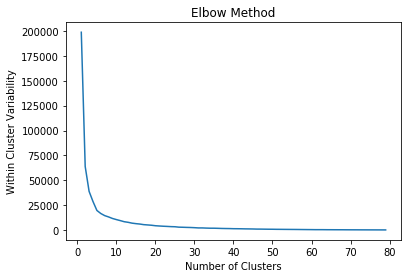

In [8]:
#Elbow Method
from sklearn.cluster import KMeans
ssd= []
for i in range(1,80):
    kmeansObj= KMeans(n_clusters=i)
    kmeansObj.fit(X)
    ssd.append(kmeansObj.inertia_)
plt.plot(range(1,80),ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Variability')
plt.show()

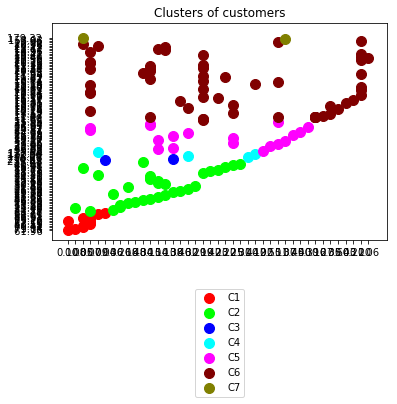

In [11]:
#Running K-means
kmeansObj= KMeans(n_clusters=7,random_state=2)
y_kmeans= kmeansObj.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans== 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans== 1, 1], s = 100, c = 'lime', label = 'C2')
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans== 2, 1], s = 100, c = 'blue', label = 'C3')
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1], s = 100, c = 'cyan', label = 'C4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s = 100, c = 'magenta', label = 'C5')
plt.scatter(X[y_kmeans== 5, 0], X[y_kmeans== 5, 1], s = 100, c = 'maroon', label = 'C6')
plt.scatter(X[y_kmeans== 6, 0], X[y_kmeans== 6, 1], s = 100, c = 'olive', label = 'C7')
#plt.scatter(X[y_kmeans== 7, 0], X[y_kmeans== 7, 1], s = 100, c = 'green', label = 'C8')
#plt.scatter(X[y_kmeans== 8, 0], X[y_kmeans== 8, 1], s = 100, c = 'purple', label = 'C4')
#plt.scatter(X[y_kmeans== 9, 0], X[y_kmeans== 9, 1], s = 100, c = 'teal', label = 'C9')
#plt.scatter(kmeansObj.cluster_centers_[:, 0], kmeansObj.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.show()

In [12]:
y_kmeans

array([2, 1, 5, 5, 5, 6, 5, 5, 5, 5, 1, 1, 1, 5, 5, 4, 4, 4, 1, 0, 3, 4,
       0, 5, 4, 4, 1, 4, 5, 1, 4, 5, 5, 5, 5, 1, 0, 2, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 4, 4, 4, 0, 5, 1, 5, 1, 5, 5, 4, 5, 5, 5, 4, 5,
       5, 1, 0, 6, 0, 1, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 3, 1, 3, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 4,
       4, 5, 5, 5, 1, 3, 0, 5, 5, 4, 0, 1, 1, 1, 5, 1, 1, 1, 1, 1],
      dtype=int32)

In [22]:
cluster_dict = {}
for i in range(0,len(y_kmeans)):
    if (y_kmeans[i] in cluster_dict):
        

ticker                             VFIAX
asset_class      Stock - Large-Cap Blend
expense_ratio                       0.04
price                            239.87 
change                             -5.94
change_pct                         -2.42
ytd                                -0.95
one_yr                              6.23
five_yr                            11.08
ten_yr                             14.30
inception                           6.09
Name: 0, dtype: object
ticker              VBIAX
asset_class      Balanced
expense_ratio        0.07
price              33.78 
change              -0.35
change_pct          -1.03
ytd                 -1.15
one_yr               2.98
five_yr              7.23
ten_yr              10.35
inception            6.08
Name: 1, dtype: object
ticker                                  VCAIX
asset_class      Bond - Inter-term State Muni
expense_ratio                            0.19
price                                  11.55 
change                           